In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [23]:
angles = pd.read_csv('angles.csv')
patients = pd.read_csv('patients.csv')
angles.describe(include='all')

,Patient_ID,Exercise,Strive_I,Ang_APP_I,Strive_F,Ang_APP_F
count,664.000000,688,573.000000,438.000000,572.000000,437.000000
unique,NaN,4,NaN,NaN,NaN,NaN
top,NaN,Seated Knee Extension,NaN,NaN,NaN,NaN
freq,NaN,218,NaN,NaN,NaN,NaN
mean,19.680723,NaN,64.065707,66.607877,36.142657,35.403664
std,12.328970,NaN,43.109712,42.312986,47.593558,45.110921
min,1.000000,NaN,-9.900000,-9.000000,-10.700000,-9.870000
25%,8.000000,NaN,7.400000,10.000000,3.600000,5.660000
50%,19.000000,NaN,86.500000,88.915000,13.200000,15.000000
75%,30.000000,NaN,96.500000,97.742500,72.750000,33.000000


In [3]:
patients.describe(include='all')

,Patient_ID,Height,Weight,BMI,Gender,Age
count,41,41,41,41,41,27.000000
unique,41,19,30,38,3,NaN
top,1,71,125,19.75130073,F,NaN
freq,1,5,3,2,21,NaN
mean,NaN,NaN,NaN,NaN,NaN,27.555556
std,NaN,NaN,NaN,NaN,NaN,12.010679
min,NaN,NaN,NaN,NaN,NaN,13.000000
25%,NaN,NaN,NaN,NaN,NaN,19.000000
50%,NaN,NaN,NaN,NaN,NaN,24.000000
75%,NaN,NaN,NaN,NaN,NaN,29.500000


In [4]:
patients.dtypes

Patient_ID     object
Height         object
Weight         object
BMI            object
Gender         object
Age           float64
dtype: object

In [5]:
angles.dtypes

Patient_ID      int64
Exercise       object
Strive_I      float64
Ang_APP_I     float64
Strive_F      float64
Ang_APP_F     float64
dtype: object

In [7]:
patients.BMI.value_counts()

19.75130073    2
23.91156463    2
21.45385742    2
23.98651061    1
32.68706747    1
20.98025712    1
25.60353798    1
22.44402436    1
28.88624567    1
24.79717813    1
27.12191358    1
22.3755787     1
46.17188966    1
24.99555556    1
33.07540433    1
26.62285587    1
21.92470483    1
25.62414201    1
35.29605263    1
31.65661575    1
25.8398307     1
25.74462891    1
22.29111149    1
#VALUE!        1
22.75986842    1
24.82324936    1
30.30075308    1
25.7658179     1
27.49511111    1
22.82074117    1
22.20945946    1
25.49459877    1
24.40487998    1
23.67244898    1
25.79944455    1
18.63599911    1
19.57562932    1
20.59570313    1
Name: BMI, dtype: int64

In [24]:
patients = patients.drop([0,1,2,3,4]).reset_index(drop = True) # dropping patient ids 1 - 5 (test "patients")
patients

,Patient_ID,Height,Weight,BMI,Gender,Age
0,6,62,108,19.75130073,F,19.0
1,7,71,178,24.82324936,M,19.0
2,8,79,269,30.30075308,M,52.0
3,9,72,190,25.7658179,M,50.0
4,10,75,220,27.49511111,M,32.0
5,11,59,113,22.82074117,F,13.0
6,12,74,173,22.20945946,M,19.0
7,13,72,188,25.49459877,M,22.0
8,14,71,175,24.40487998,M,19.0
9,15,70,165,23.67244898,M,42.0


In [25]:
patients.BMI = patients.BMI.astype('float')
patients.Height = patients.Height.astype('int')
patients.Weight = patients.Weight.astype('int')
patients.Gender = pd.Categorical(patients.Gender, ['M','F'], ordered=False)

In [14]:
patients.describe(include='all')

,Patient_ID,Height,Weight,BMI,Gender,Age
count,36,36.000000,36.000000,36.000000,36,27.000000
unique,36,NaN,NaN,NaN,2,NaN
top,6,NaN,NaN,NaN,F,NaN
freq,1,NaN,NaN,NaN,20,NaN
mean,NaN,68.250000,172.027778,25.495415,NaN,27.555556
std,NaN,4.759202,53.527822,5.342760,NaN,12.010679
min,NaN,59.000000,108.000000,18.635999,NaN,13.000000
25%,NaN,64.000000,133.750000,22.138271,NaN,19.000000
50%,NaN,68.000000,165.000000,24.810214,NaN,24.000000
75%,NaN,72.000000,192.500000,26.747620,NaN,29.500000


In [15]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Patient_ID  36 non-null     object  
 1   Height      36 non-null     int32   
 2   Weight      36 non-null     int32   
 3   BMI         36 non-null     float64 
 4   Gender      36 non-null     category
 5   Age         27 non-null     float64 
dtypes: category(1), float64(2), int32(2), object(1)
memory usage: 1.4+ KB


In [26]:
angles.Patient_ID = angles.Patient_ID.astype('object')
angles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Patient_ID  664 non-null    object 
 1   Exercise    688 non-null    object 
 2   Strive_I    573 non-null    float64
 3   Ang_APP_I   438 non-null    float64
 4   Strive_F    572 non-null    float64
 5   Ang_APP_F   437 non-null    float64
dtypes: float64(4), object(2)
memory usage: 32.4+ KB


In [27]:
angles[angles.columns[angles.isna().any()]]

,Patient_ID,Strive_I,Ang_APP_I,Strive_F,Ang_APP_F
0,1.0,97.0,92.0,15.0,25.0
1,1.0,97.0,88.0,34.0,45.0
2,1.0,103.0,105.0,6.0,20.0
3,1.0,107.0,110.0,20.0,25.0
4,1.0,106.0,111.0,42.0,50.0
...,...,...,...,...,...
683,41.0,0.0,NaN,114.8,NaN
684,41.0,3.3,NaN,128.3,NaN
685,41.0,-1.0,NaN,116.5,NaN
686,41.0,1.7,NaN,118.2,NaN


In [28]:
# drop rows were measurements were missing or partially taken.
new_angles = angles.dropna().reset_index(drop=True)
new_angles

,Patient_ID,Exercise,Strive_I,Ang_APP_I,Strive_F,Ang_APP_F
0,1.0,Seated Knee Extension,97.0,92.00,15.0,25.00
1,1.0,Seated Knee Extension,97.0,88.00,34.0,45.00
2,1.0,Seated Knee Extension,103.0,105.00,6.0,20.00
3,1.0,Seated Knee Extension,107.0,110.00,20.0,25.00
4,1.0,Seated Knee Extension,106.0,111.00,42.0,50.00
...,...,...,...,...,...,...
432,39.0,Supine Heel Slide,9.4,8.08,122.6,127.53
433,39.0,Supine Heel Slide,3.9,7.38,120.8,118.08
434,39.0,Supine Heel Slide,2.5,4.12,121.4,123.68
435,39.0,Supine Heel Slide,4.5,3.77,121.9,124.47


In [29]:
new_angles.describe(include='all')

,Patient_ID,Exercise,Strive_I,Ang_APP_I,Strive_F,Ang_APP_F
count,437.0,437,437.000000,437.000000,437.000000,437.000000
unique,32.0,4,NaN,NaN,NaN,NaN
top,2.0,Seated Knee Extension,NaN,NaN,NaN,NaN
freq,25.0,165,NaN,NaN,NaN,NaN
mean,NaN,NaN,65.855492,66.555584,34.517620,35.403664
std,NaN,NaN,43.538744,42.347311,44.542648,45.110921
min,NaN,NaN,-9.900000,-9.000000,-10.700000,-9.870000
25%,NaN,NaN,9.100000,10.000000,5.000000,5.660000
50%,NaN,NaN,89.100000,88.900000,14.900000,15.000000
75%,NaN,NaN,97.400000,97.750000,30.000000,33.000000


In [30]:
new_angles.Exercise = pd.Categorical(new_angles.Exercise, ['Seated Knee Extension', 'Sit to Stand Squat', 'Supine Heel Slide', 'Supine Straight Leg Raise'], ordered=False)

In [21]:
new_angles.dtypes

Patient_ID      object
Exercise      category
Strive_I       float64
Ang_APP_I      float64
Strive_F       float64
Ang_APP_F      float64
dtype: object

In [31]:
new_angles['Initial_Diff'] = new_angles.Strive_I - new_angles.Ang_APP_I
new_angles['Final_Diff'] = new_angles.Strive_F - new_angles.Ang_APP_F
new_angles.groupby('Exercise').describe(include='all')

Patient_ID                                         \
                               count unique  top  freq mean std min 25% 50%   
Exercise                                                                      
Seated Knee Extension          165.0   32.0  2.0  10.0  NaN NaN NaN NaN NaN   
Sit to Stand Squat             148.0   30.0  1.0   5.0  NaN NaN NaN NaN NaN   
Supine Heel Slide               89.0   18.0  1.0   5.0  NaN NaN NaN NaN NaN   
Supine Straight Leg Raise       35.0    7.0  1.0   5.0  NaN NaN NaN NaN NaN   

                               ... Final_Diff                               \
                          75%  ...     unique top freq      mean       std   
Exercise                       ...                                           
Seated Knee Extension     NaN  ...        NaN NaN  NaN -0.553273  3.272316   
Sit to Stand Squat        NaN  ...        NaN NaN  NaN -0.033108  3.157549   
Supine Heel Slide         NaN  ...        NaN NaN  NaN -1.500112  4.676930   
Supine Straight Leg Raise NaN  ...        NaN NaN  NaN -4.500029  5.694281   

                                                              
                            min    25%    50%     75%    max  
Exercise                                                      
Seated Knee Extension     -14.0 -2.060 -0.150  1.3400  11.00  
Sit to Stand Squat        -13.0 -1.435  0.245  1.1725  11.51  
Supine Heel Slide         -14.0 -3.190 -0.970  1.4900  13.00  
Supine Straight Leg Raise -18.0 -7.000 -3.200  0.0000   2.69  

[4 rows x 77 columns]

In [32]:
new_angles.Exercise.unique()
new_angles.Exercise.value_counts()

Seated Knee Extension        165
Sit to Stand Squat           148
Supine Heel Slide             89
Supine Straight Leg Raise     35
Name: Exercise, dtype: int64

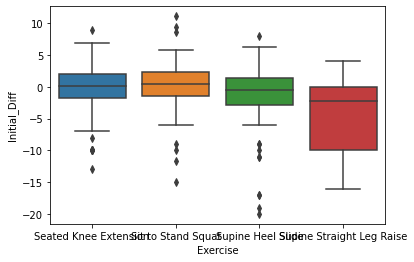

In [33]:
sns.boxplot(data = new_angles, x = 'Exercise', y = 'Initial_Diff')
plt.show()

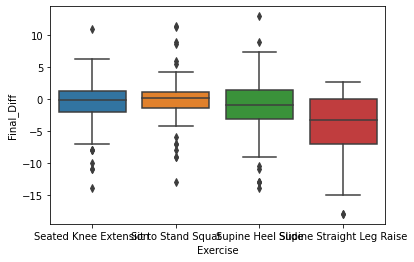

In [34]:
sns.boxplot(data = new_angles, x = 'Exercise', y = 'Final_Diff')
plt.show()

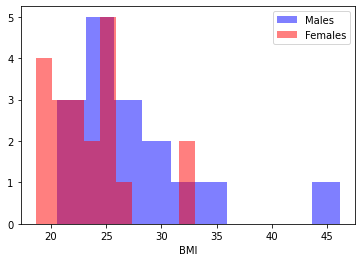

In [37]:
males_BMI = patients.BMI[patients.Gender=='M']
females_BMI = patients.BMI[patients.Gender == 'F']
plt.hist(males_BMI, color = "blue", density = False, alpha = 0.5, label = 'Males')
plt.hist(females_BMI, color = "red", density = False, alpha = 0.5, label = 'Females')
plt.xlabel("BMI")
plt.legend()
plt.show()

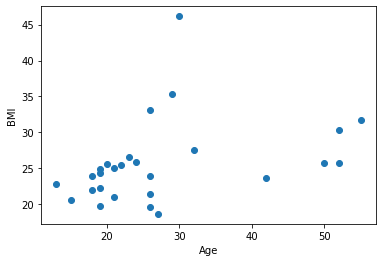

In [38]:
plt.scatter(x=patients.Age, y=patients.BMI)
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

In [36]:
patients.Gender.value_counts()

F    20
M    16
Name: Gender, dtype: int64

Example Statistics from CodeAcademy


import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

npi = pd.read_csv("npi_sample.csv")

print(npi.head())

blend_special_freq = pd.crosstab(npi.blend_in,npi.special)
print(blend_special_freq)

blend_special_prop = blend_special_freq/len(npi)
print(blend_special_prop)

special_marginals = blend_special_prop.sum(axis = 0)
blend_marginals = blend_special_prop.sum(axis = 1)
print(special_marginals)
print(blend_marginals)

chi2, pval, dof, expected = chi2_contingency(blend_special_freq)
print("expected contingency table (no association):" + str(np.round(expected)))
print(chi2)